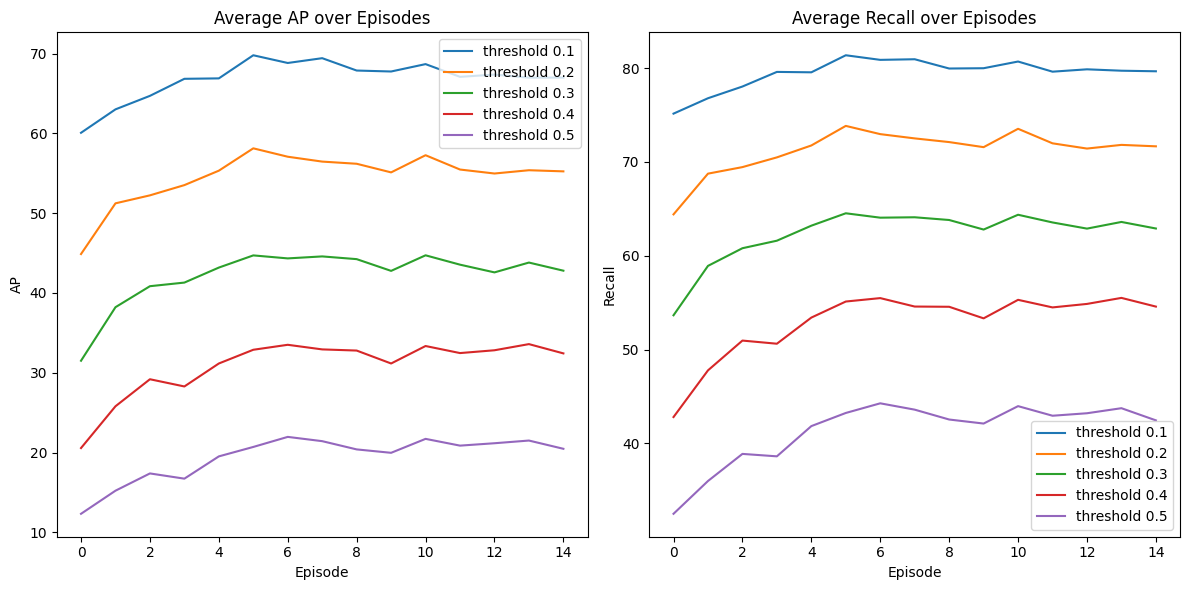

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = 'logs_over_epochs.csv'
data_full = pd.read_csv(file_path, header=None)

# Initialize lists to store data
episodes = []
ap_values = []
recall_values = []

# Parse the data
for index, row in data_full.iterrows():
    row_data = row[0].strip()
    if row_data.startswith("Episode"):
        episodes.append(int(row_data.split()[1]))
    elif row_data.startswith("ap"):
        ap_values.append([float(x) for x in row_data.split()[1:]])
    elif row_data.startswith("recall"):
        recall_values.append([float(x) for x in row_data.split()[1:]])

# Convert lists to numpy arrays
ap_values = np.array(ap_values)
recall_values = np.array(recall_values)

# Get unique episodes
unique_episodes = list(set(episodes))
unique_episodes.sort()

# Initialize arrays for average values
avg_ap_values = np.zeros((len(unique_episodes), ap_values.shape[1]))
avg_recall_values = np.zeros((len(unique_episodes), recall_values.shape[1]))

# Calculate average values for each unique episode
for i, episode in enumerate(unique_episodes):
    indices = [index for index, ep in enumerate(episodes) if ep == episode]
    avg_ap_values[i] = np.mean(ap_values[indices], axis=0)
    avg_recall_values[i] = np.mean(recall_values[indices], axis=0)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot AP values
plt.subplot(1, 2, 1)
for i in range(avg_ap_values.shape[1]):
    plt.plot(unique_episodes, avg_ap_values[:, i], label=f'threshold { round(((i+1)*0.1),2)}')
plt.xlabel('Episode')
plt.ylabel('AP')
plt.title('Average AP over Episodes')
plt.legend()

# Plot Recall values
plt.subplot(1, 2, 2)
for i in range(avg_recall_values.shape[1]):
    plt.plot(unique_episodes, avg_recall_values[:, i], label=f'threshold { round(((i+1)*0.1),2)}')
plt.xlabel('Episode')
plt.ylabel('Recall')
plt.title('Average Recall over Episodes')
plt.legend()

plt.tight_layout()
plt.show()
